# NB Setup

In [ ]:
%load_ext autoreload
%autoreload 2

# %matplotlib widget

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import uproot
import logging
import tpvalidator.mcprod.workspace as workspace
import tpvalidator.utilities as utils
import tpvalidator.mcprod.analyzers.snn as snn

from rich import print
from tpvalidator.utilities import temporary_log_level, subplot_autogrid, pandas_backend
from tpvalidator.histograms import uproot_hist_mean_std

# Code

In [ ]:
from typing import Tuple, Optional, Union, Sequence, Dict, List
from rich.table import Table
import tpvalidator.mcprod.geometry as dunegeo


def make_rates_table( datasets : Dict[str,pd.DataFrame], preselection: str, title: str='') -> Table:
    """
    """
    
    # Constants : move them somewhere else
    ro_win = 8500
    sampling_period = 0.5e-6
    num_crps = 12

    t = Table('sample', 'time', 'U', 'V', 'X', title=title)
    for s, ws in datasets.items():
        num_ev = ws.num_events
        total_time = num_ev*ro_win*sampling_period
        row = [s, f'{total_time} s']
        tps_noise = ws.tps.query(preselection)
        for v in range(3):
            num_chans = dunegeo.crp_num_chans_by_view_sim[v]*num_crps
            noise_rate = len(tps_noise.query(f'readout_view == {v}'))/total_time/num_chans
            row += [f'{noise_rate:.2f} Hz']
        t.add_row(*row)
    return t

In [ ]:

def draw_bt_eff_by_plane(ws, rop_id, ax):
    tot_nel_df = ws.event_summary[['event', f'tot_numelectrons_rop{rop_id}']].set_index('event')
    bt_nel_df = pd.DataFrame(ws.tps.query(f'bt_is_signal == 1 & readout_plane_id == {rop_id}').groupby('event').bt_numelectrons.sum())
    eff_df = tot_nel_df.merge(bt_nel_df, how='inner', on='event').fillna(0)
    eff_df['ratio'] = eff_df.bt_numelectrons/eff_df[f'tot_numelectrons_rop{rop_id}']
    eff_df.ratio.hist(ax=ax)
    return eff_df


# Dataset loading and preparation

In [ ]:
from pathlib import Path
pre_prod_dir = Path('../../data/vd/pre_prod/')

with temporary_log_level(workspace.TriggerPrimitivesWorkspace._log, logging.WARN):
    mu_ws = workspace.TriggerPrimitivesWorkspace(pre_prod_dir / 'anatree_vd_muminus_hist.root')

mu_ws.add_rawdigits(pre_prod_dir / 'rawdigits' / 'trigger_digits_hists_detsim_vd_muminus.root')
print(mu_ws.info)

with temporary_log_level(workspace.TriggerPrimitivesWorkspace._log, logging.WARN):
    em_ws = workspace.TriggerPrimitivesWorkspace(pre_prod_dir / 'anatree_vd_eminus_hist.root')

em_ws.add_rawdigits(pre_prod_dir / 'rawdigits' / 'trigger_digits_hists_detsim_vd_eminus.root')
print(em_ws.info)

with temporary_log_level(workspace.TriggerPrimitivesWorkspace._log, logging.WARN):
    gm_ws = workspace.TriggerPrimitivesWorkspace(pre_prod_dir / 'anatree_vd_gamma_hist.root')

gm_ws.add_rawdigits(pre_prod_dir / 'rawdigits' / 'trigger_digits_hists_detsim_vd_gamma.root')
print(gm_ws.info)


with temporary_log_level(workspace.TriggerPrimitivesWorkspace._log, logging.WARN):
    ar39_ws = workspace.TriggerPrimitivesWorkspace(pre_prod_dir / 'anatree_vd_ar39_hist.root')

ar39_ws.add_rawdigits(pre_prod_dir / 'rawdigits' / 'trigger_digits_hists_detsim_vd_ar39.root')

print(ar39_ws.info)


with temporary_log_level(workspace.TriggerPrimitivesWorkspace._log, logging.WARN):
    rad_ws = workspace.TriggerPrimitivesWorkspace(pre_prod_dir / 'anatree_vd_radiols_hist.root')
rad_ws.add_rawdigits(pre_prod_dir / 'rawdigits' / 'trigger_digits_hists_detsim_vd_radiols.root')

print(rad_ws.info)


datasets = {
    'e-minus': em_ws,
    'gamma': gm_ws,
    'mu-minus': mu_ws,
    'ar39': ar39_ws,
    'radiols': rad_ws
}

{
    'backtracker': {'TPAlgTPCSimpleThreshold': {'offset_U': 8, 'offset_V': 1, 'offset_X': -7}},
    'geo': {'detector': 'dunevd10kt_3view_30deg_v5_refactored_1x8x6ref'},
    'tpg': {
        'tpmakerTPCSimpleThreshold::TriggerPrimitiveMaker': {
            'threshold_tpg_plane0': 45,
            'threshold_tpg_plane1': 45,
            'threshold_tpg_plane2': 45,
            'tool': 'TPAlgTPCSimpleThreshold'
        }
    }
}

{
    'backtracker': {'TPAlgTPCSimpleThreshold': {'offset_U': 8, 'offset_V': 1, 'offset_X': -7}},
    'geo': {'detector': 'dunevd10kt_3view_30deg_v5_refactored_1x8x6ref'},
    'tpg': {
        'tpmakerTPCSimpleThreshold::TriggerPrimitiveMaker': {
            'threshold_tpg_plane0': 45,
            'threshold_tpg_plane1': 45,
            'threshold_tpg_plane2': 45,
            'tool': 'TPAlgTPCSimpleThreshold'
        }
    }
}

{
    'backtracker': {'TPAlgTPCSimpleThreshold': {'offset_U': 8, 'offset_V': 1, 'offset_X': -7}},
    'geo': {'detector': 'dunevd10kt_3view_30deg_v5_refactored_1x8x6ref'},
    'tpg': {
        'tpmakerTPCSimpleThreshold::TriggerPrimitiveMaker': {
            'threshold_tpg_plane0': 45,
            'threshold_tpg_plane1': 45,
            'threshold_tpg_plane2': 45,
            'tool': 'TPAlgTPCSimpleThreshold'
        }
    }
}

{
    'backtracker': {'TPAlgTPCSimpleThreshold': {'offset_U': 8, 'offset_V': 1, 'offset_X': -7}},
    'geo': {'detector': 'dunevd10kt_3view_30deg_v5_refactored_1x8x6ref'},
    'tpg': {
        'tpmakerTPCSimpleThreshold::TriggerPrimitiveMaker': {
            'threshold_tpg_plane0': 45,
            'threshold_tpg_plane1': 45,
            'threshold_tpg_plane2': 45,
            'tool': 'TPAlgTPCSimpleThreshold'
        }
    }
}

{
    'backtracker': {'TPAlgTPCSimpleThreshold': {'offset_U': 8, 'offset_V': 1, 'offset_X': -7}},
    'geo': {'detector': 'dunevd10kt_3view_30deg_v5_refactored_1x8x6ref'},
    'tpg': {
        'tpmakerTPCSimpleThreshold::TriggerPrimitiveMaker': {
            'threshold_tpg_plane0': 45,
            'threshold_tpg_plane1': 45,
            'threshold_tpg_plane2': 45,
            'tool': 'TPAlgTPCSimpleThreshold'
        }
    }
}

# Signal and noise distribution - comparison among datasets

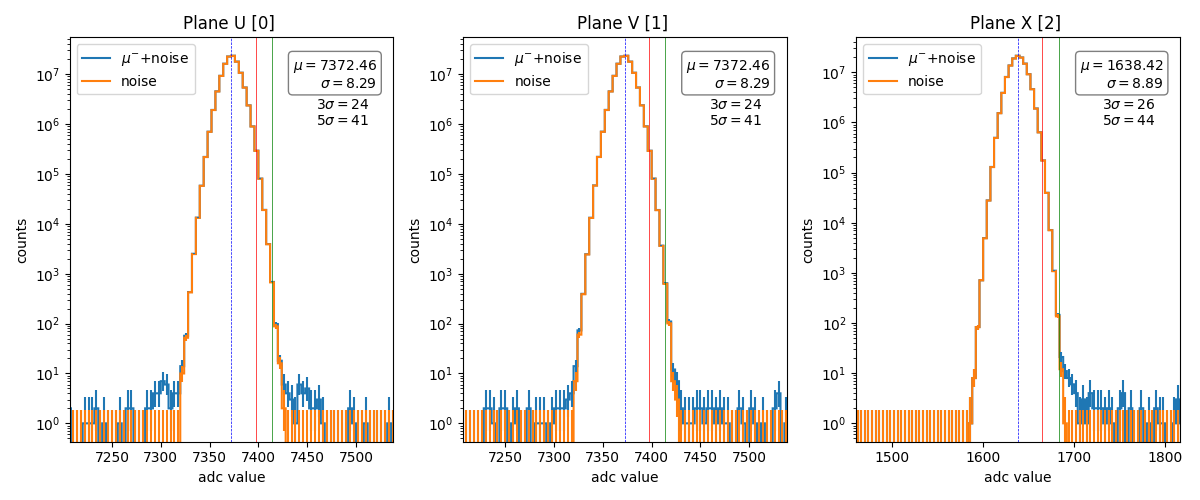

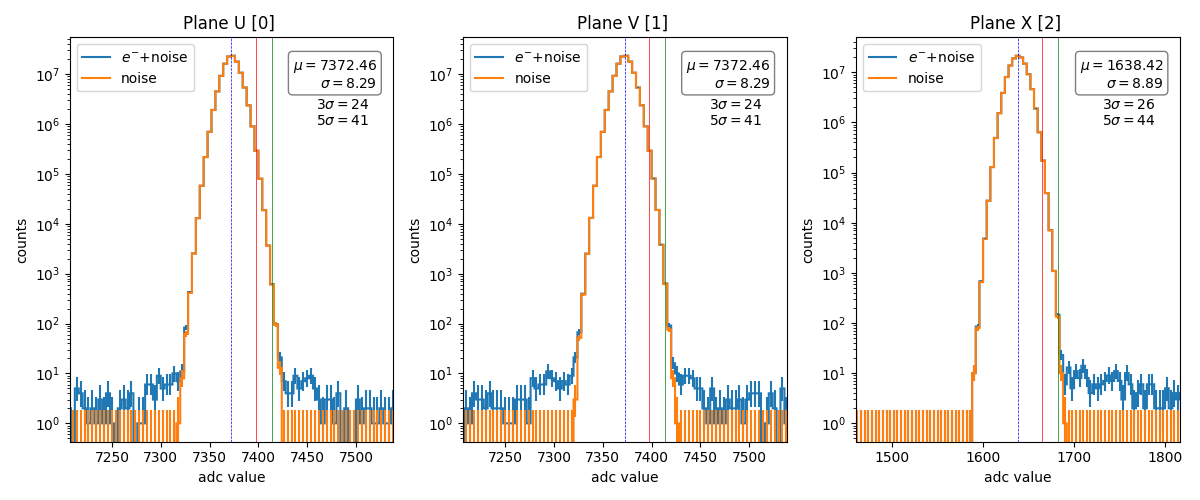

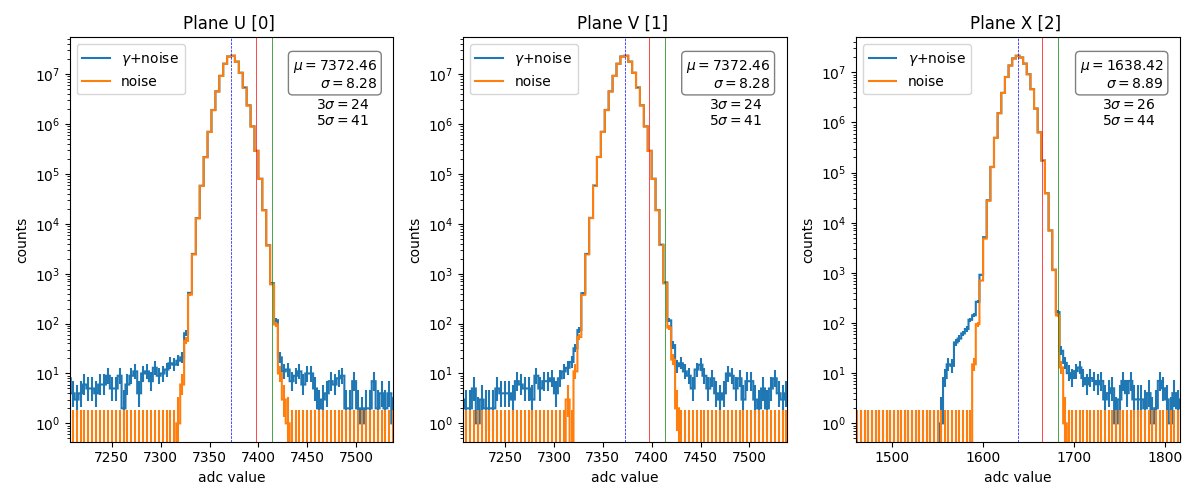

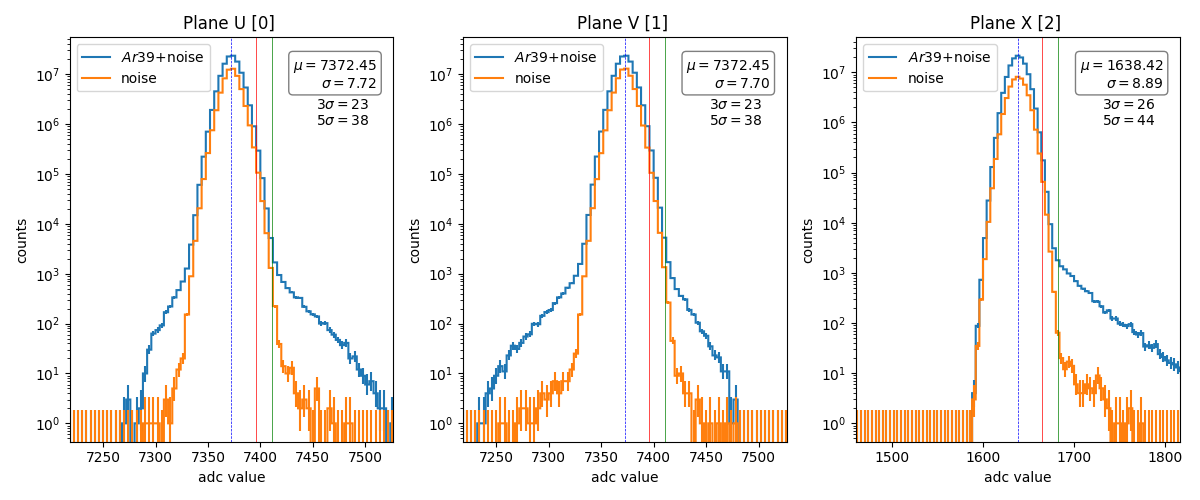

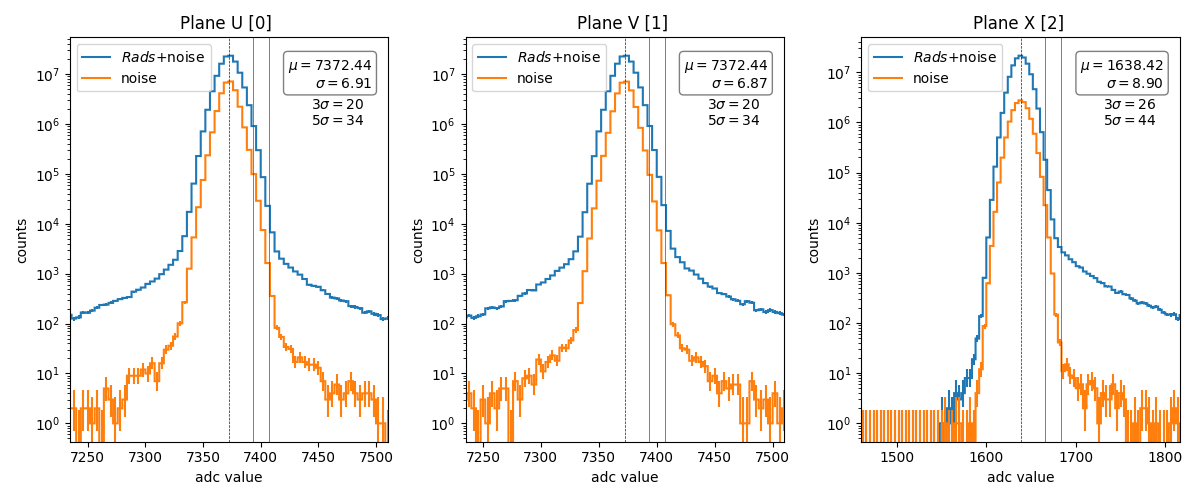

In [ ]:
_ = snn.draw_signal_and_noise_adc_distros(mu_ws, signal_label=r"$\mu^{-}$")
_ = snn.draw_signal_and_noise_adc_distros(em_ws, signal_label=r"$e^{-}$")
_ = snn.draw_signal_and_noise_adc_distros(gm_ws, signal_label=r"$\gamma$")
_ = snn.draw_signal_and_noise_adc_distros(ar39_ws, signal_label=r"$Ar39$")
_ = snn.draw_signal_and_noise_adc_distros(rad_ws, signal_label=r"$Rads$")


# Noise TP rates

In [ ]:

print(make_rates_table(datasets, 'bt_is_signal == 0', 'noise TP rates'))
print(make_rates_table(datasets, 'bt_is_signal == 1', 'signal TP rates'))



                    noise TP rates                    
┏━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┓
┃ sample   ┃ time    ┃ U        ┃ V        ┃ X       ┃
┡━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━┩
│ e-minus  │ 0.425 s │ 0.73 Hz  │ 0.72 Hz  │ 0.30 Hz │
│ gamma    │ 0.425 s │ 0.74 Hz  │ 0.72 Hz  │ 0.29 Hz │
│ mu-minus │ 0.425 s │ 0.72 Hz  │ 0.73 Hz  │ 0.31 Hz │
│ ar39     │ 0.425 s │ 1.60 Hz  │ 2.46 Hz  │ 1.41 Hz │
│ radiols  │ 0.425 s │ 11.45 Hz │ 15.43 Hz │ 6.23 Hz │
└──────────┴─────────┴──────────┴──────────┴─────────┘

                    signal TP rates                    
┏━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃ sample   ┃ time    ┃ U        ┃ V        ┃ X        ┃
┡━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│ e-minus  │ 0.425 s │ 0.39 Hz  │ 0.36 Hz  │ 0.45 Hz  │
│ gamma    │ 0.425 s │ 0.34 Hz  │ 0.33 Hz  │ 0.41 Hz  │
│ mu-minus │ 0.425 s │ 0.31 Hz  │ 0.31 Hz  │ 0.37 Hz  │
│ ar39     │ 0.425 s │ 19.95 Hz │ 9.66 Hz  │ 31.61 Hz │
│ radiols  │ 0.425 s │ 51.97 Hz │ 30.72 Hz │ 73.51 Hz │
└──────────┴─────────┴──────────┴──────────┴──────────┘

# Singal and noise TP distributions

adc_peak 956
adc_integral 1006
samples_over_threshold 38
adc_peak 829
adc_integral 1023
samples_over_threshold 43
adc_peak 847
adc_integral 1018
samples_over_threshold 43
adc_peak 85
adc_integral 790
samples_over_threshold 11
adc_peak 572
adc_integral 838
samples_over_threshold 18


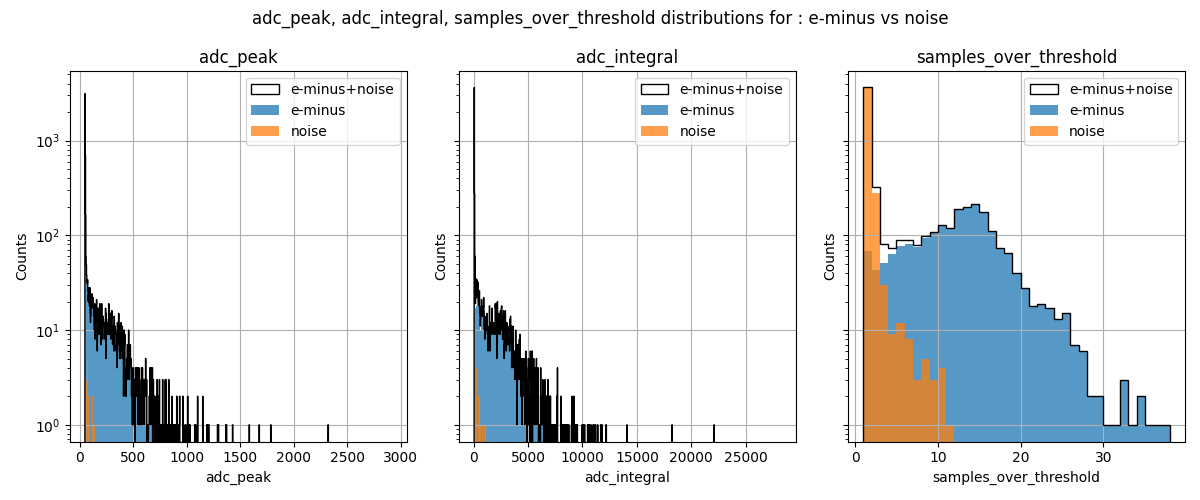

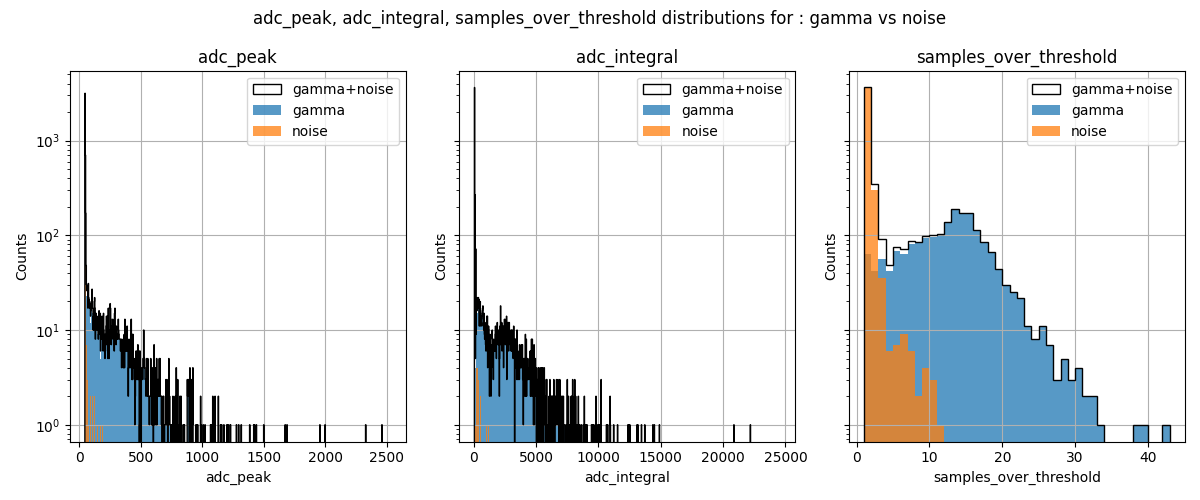

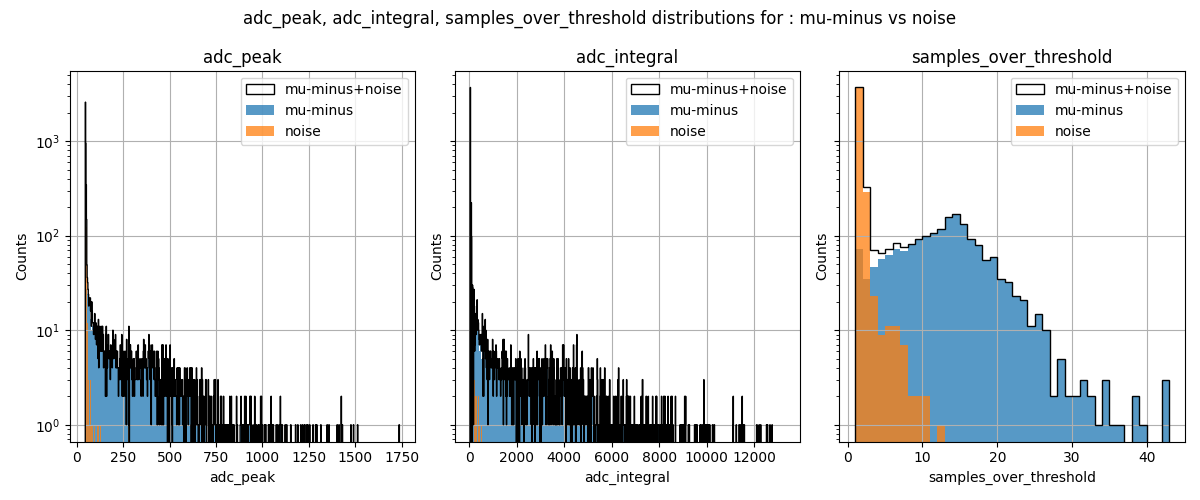

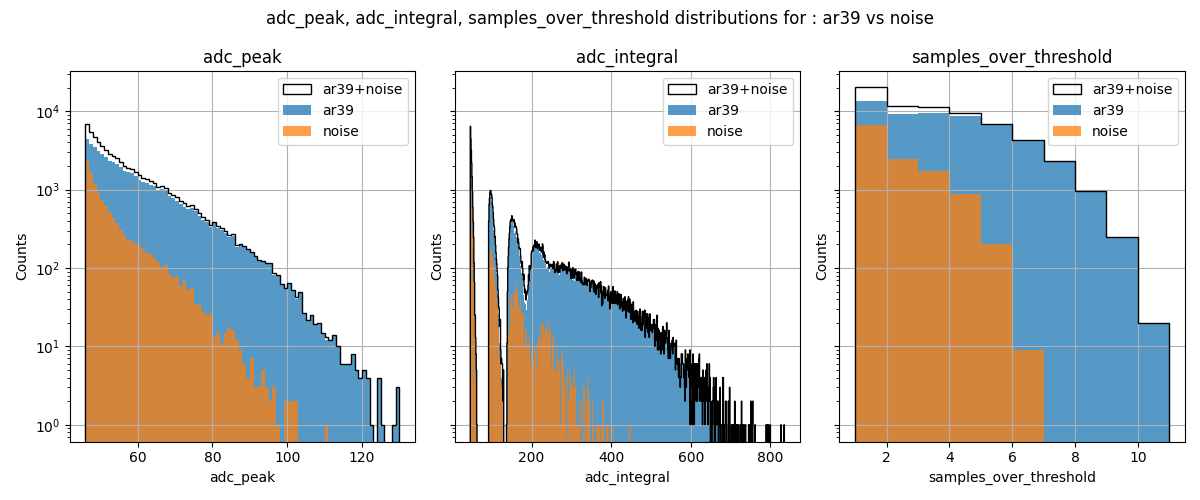

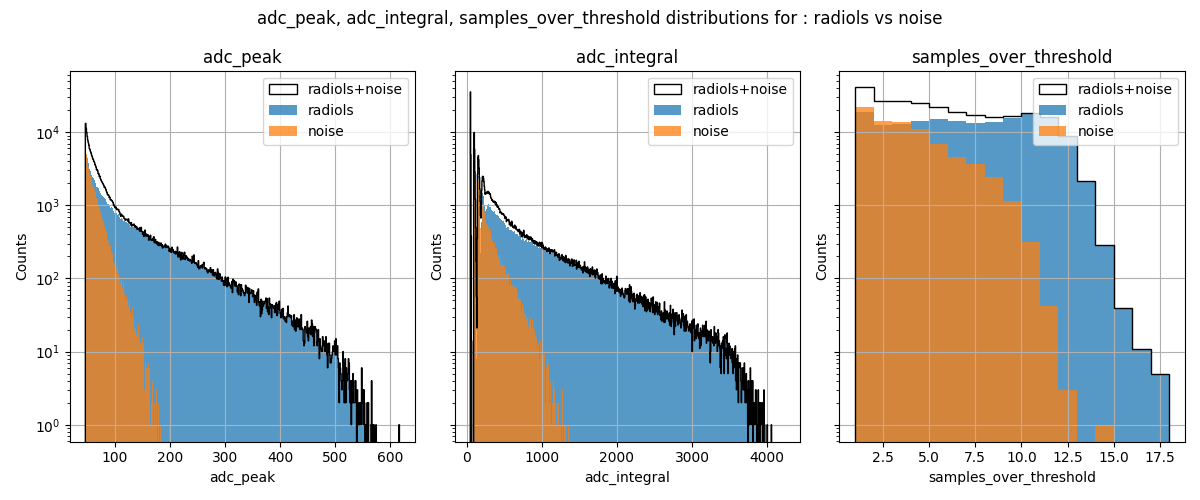

In [ ]:
for n, ws in datasets.items():
    tp_sel = snn.TPSignalNoisePreSelection(ws.tps[(ws.tps.sample_start >100) & (ws.tps.sample_start <8100)])
    tp_ana = snn.TPSignalNoiseAnalyzer(tp_sel, signal_name = n)
    fig = tp_ana.draw_tp_signal_noise_dist(roview=1)


# TP origin in the detector

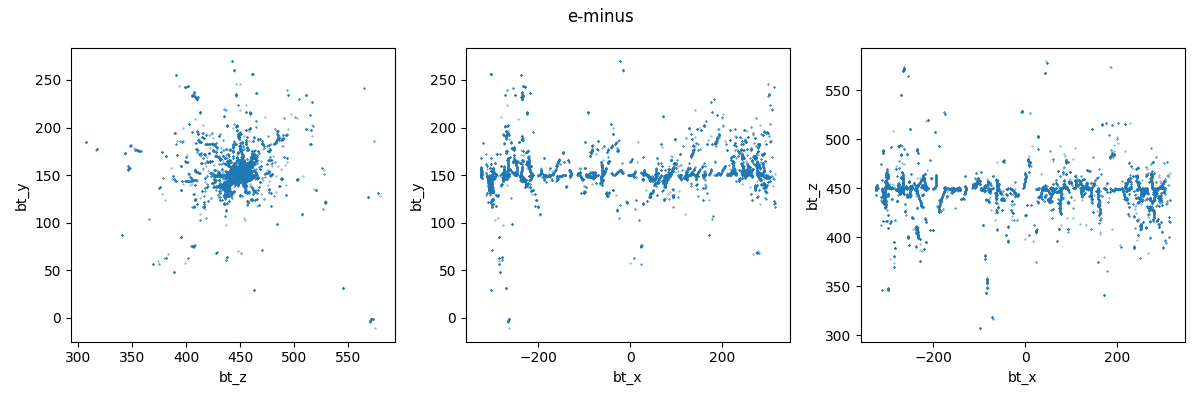

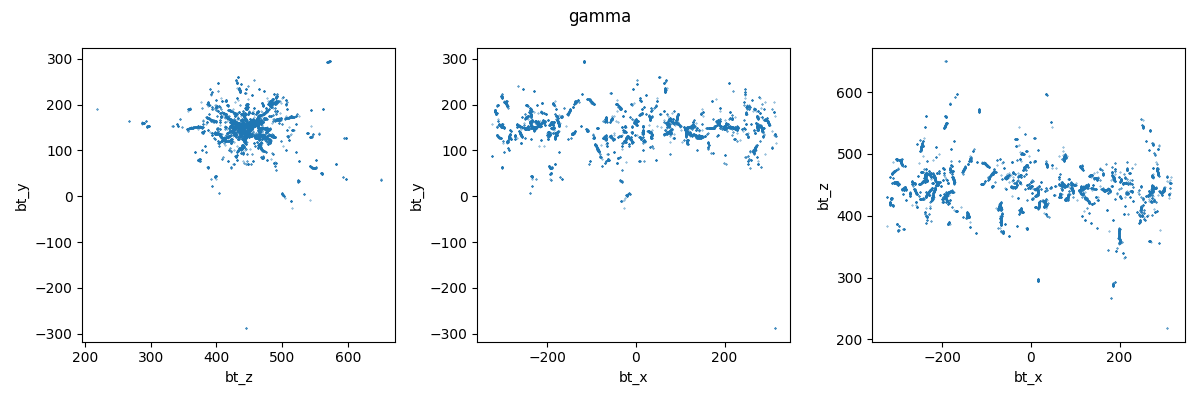

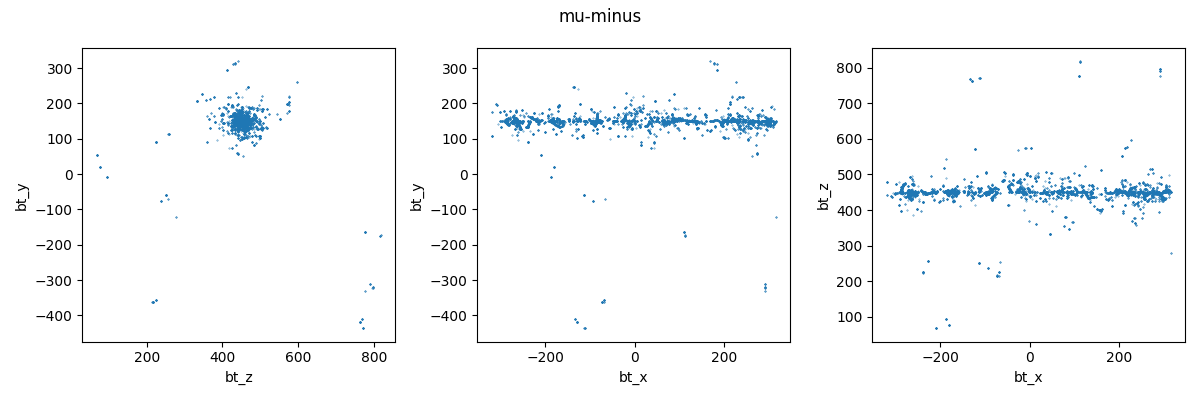

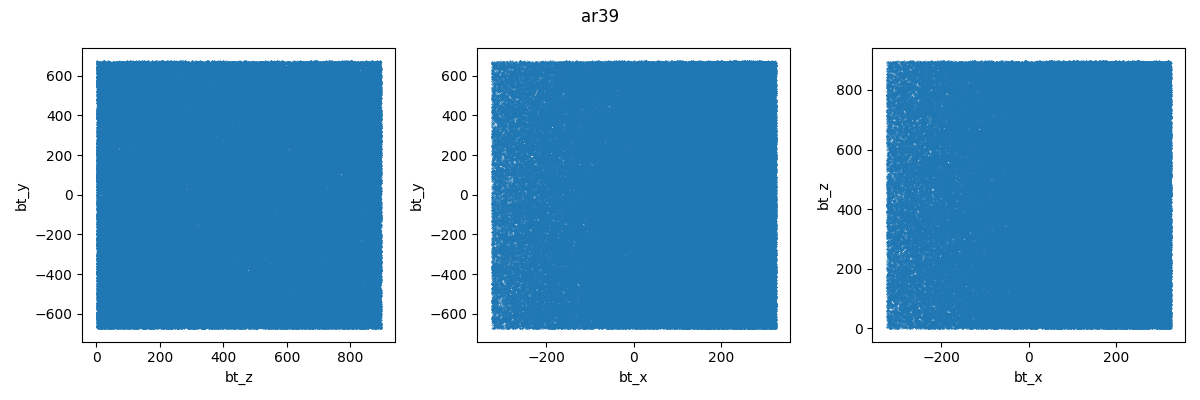

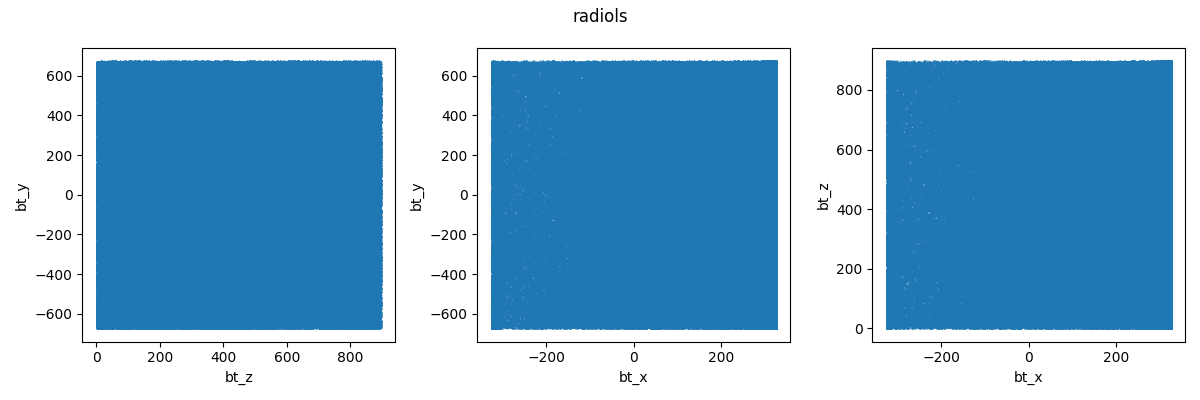

In [ ]:
for n, ws in datasets.items():
    fig, axes = plt.subplots(1,3, figsize=(12,4))
    ax=axes[0]
    ws.tps.query('bt_is_signal').plot.scatter(x='bt_z', y='bt_y', ax=ax, s=0.1)
    ax=axes[1]
    ws.tps.query('bt_is_signal').plot.scatter(x='bt_x', y='bt_y', ax=ax, s=0.1)
    ax=axes[2]
    ws.tps.query('bt_is_signal').plot.scatter(x='bt_x', y='bt_z', ax=ax, s=0.1)
    fig.suptitle(n)
    fig.tight_layout()

# Backtracking coverage

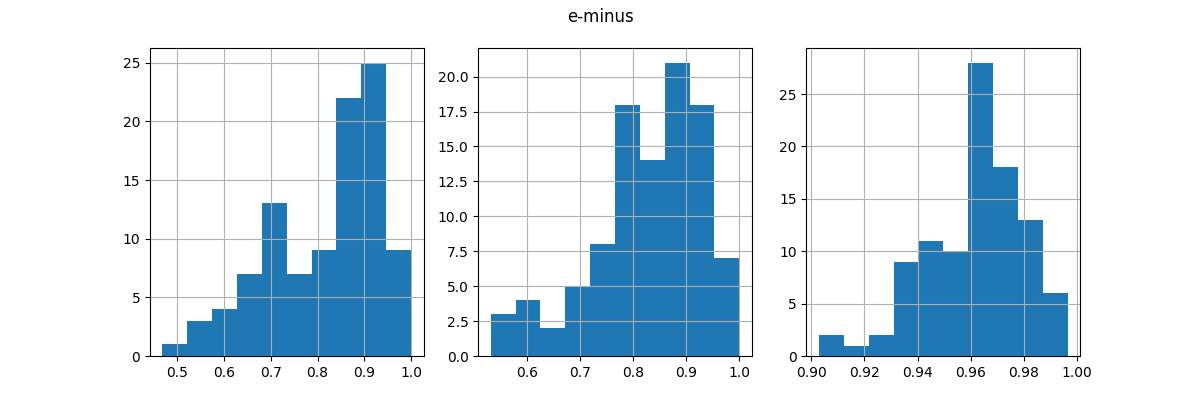

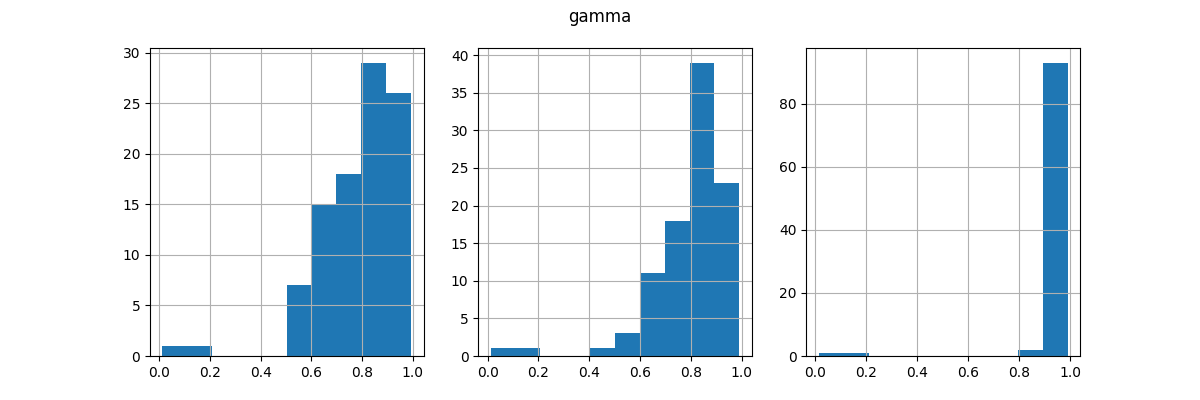

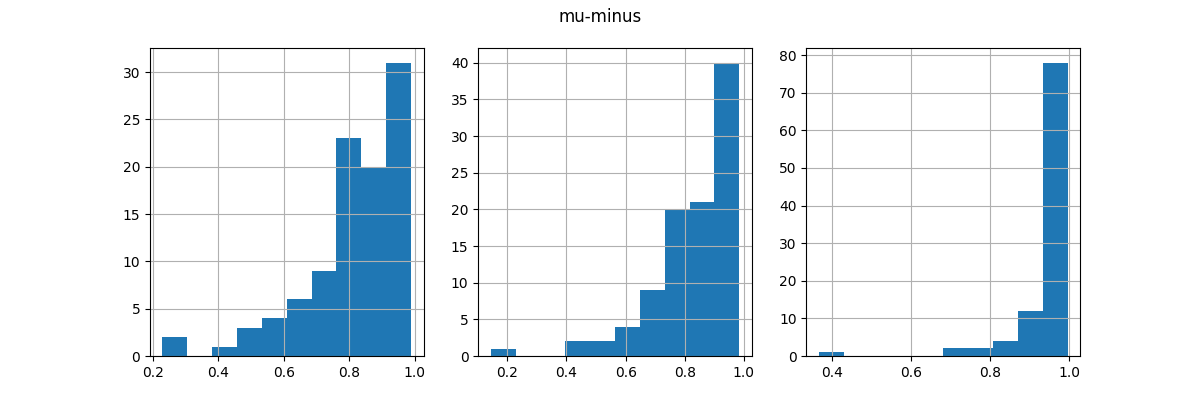

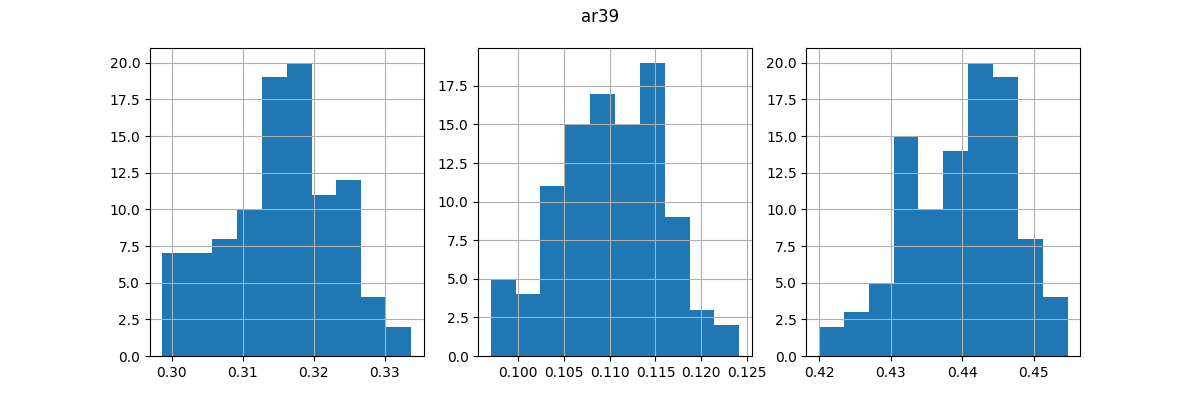

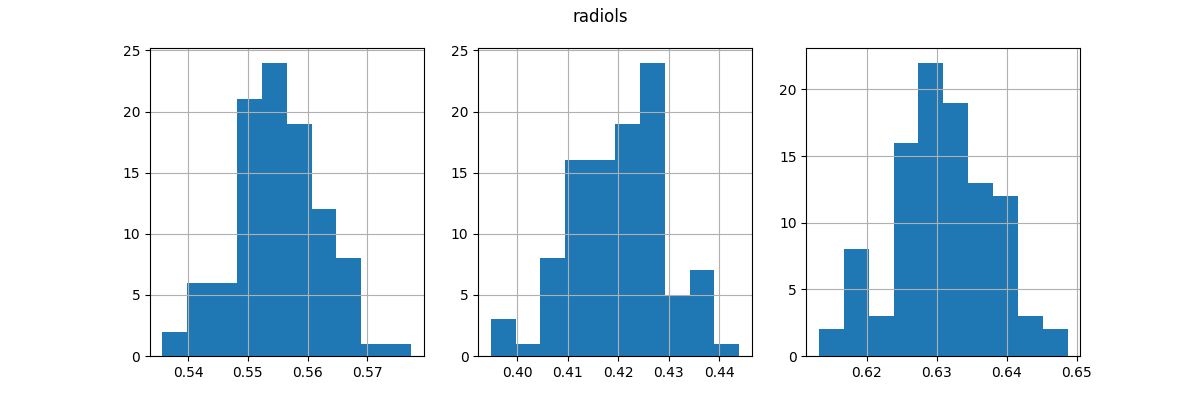

In [ ]:
for n, ws in datasets.items():
    fig, axes = plt.subplots(1,3, figsize=(12,4))
    em_0_df = draw_bt_eff_by_plane(ws, 0, axes[0])
    em_1_df = draw_bt_eff_by_plane(ws, 1, axes[1])
    em_2_df = draw_bt_eff_by_plane(ws, 2, axes[2])
    fig.suptitle(n)

# Others


TPs view 0 : 6561, signal=2290, noise=4271

TPs view 1 : 3567, signal=2055, noise=1512

TPs view 2 : 3148, signal=2629 noise=519

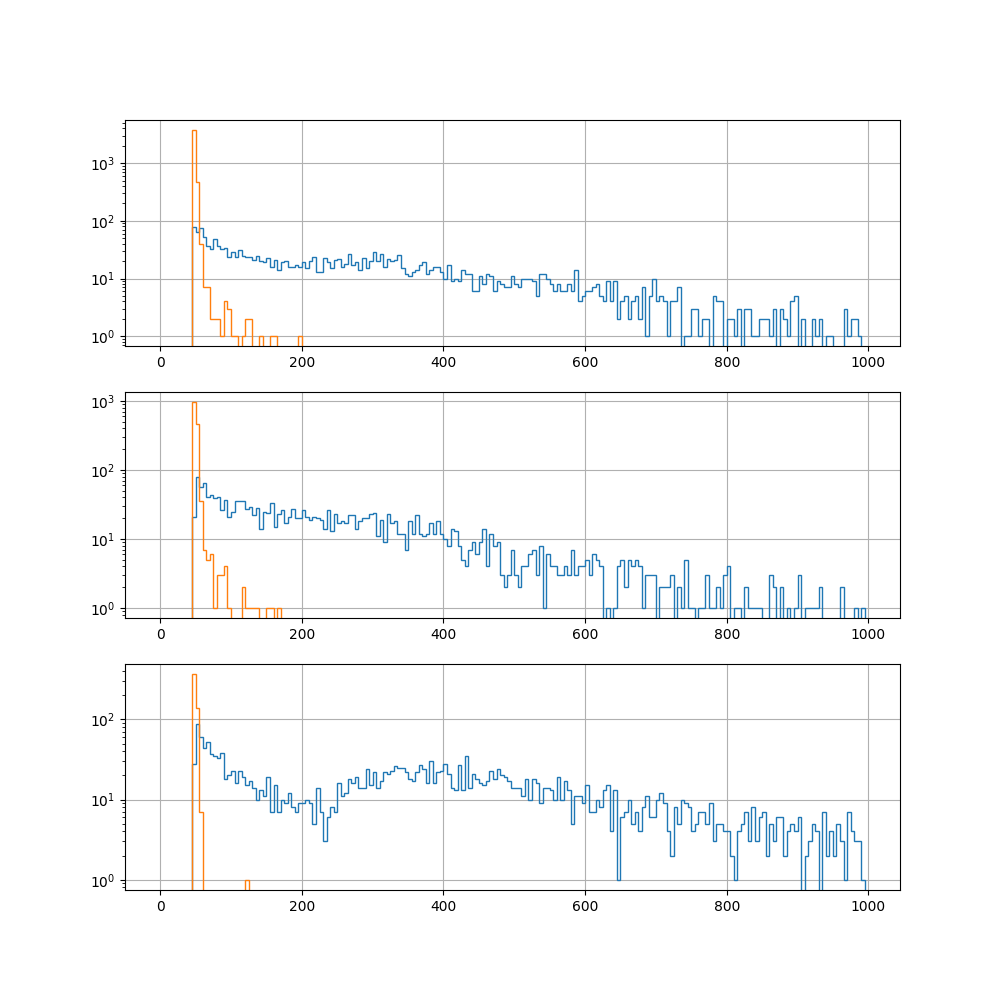

In [ ]:
fig, axes = plt.subplots(3,1, figsize=(10,10), squeeze=False)

bins_sot=list(range(0,45))
bins_peak=list(range(0,1000, 5))

ws = em_ws
tps_p0 = ws.tps.query(f'readout_view==0 & adc_peak > 44')
print(f"TPs view 0 : {len(tps_p0)}, signal={len(tps_p0.query('bt_is_signal==1'))}, noise={len(tps_p0.query('bt_is_signal==0'))}")

ax=axes[0,0]
# tps_p0.query('bt_is_signal').samples_over_threshold.hist(ax=ax, bins=bins_sot, histtype='step')
# tps_p0.query('bt_is_signal == 0').samples_over_threshold.hist(ax=ax, bins=bins_sot, histtype='step')
# ax.set_yscale('log')

# ax=axes[0,1]
# bins=list(range(0,40000, 400))
# # bins=None
# tps_p0.query('bt_is_signal').adc_integral.hist(ax=ax, bins=bins, histtype='step')
# tps_p0.query('bt_is_signal == 0').adc_integral.hist(ax=ax, bins=bins, histtype='step')
# ax.set_yscale('log')

# ax=axes[0,2]
bins=list(range(0,7500, 150))
# bins=None
tps_p0.query('bt_is_signal').adc_peak.hist(ax=ax, bins=bins_peak, histtype='step')
tps_p0.query('bt_is_signal == 0').adc_peak.hist(ax=ax, bins=bins_peak, histtype='step')
ax.set_yscale('log')

tps_p1 = ws.tps.query(f'readout_view==1 & adc_peak > 47')
print(f"TPs view 1 : {len(tps_p1)}, signal={len(tps_p1.query('bt_is_signal==1'))}, noise={len(tps_p1.query('bt_is_signal==0'))}")

ax=axes[1,0]
# bins=list(range(0,40))
# tps_p1.query('bt_is_signal').samples_over_threshold.hist(ax=ax, bins=bins_sot)
# tps_p1.query('bt_is_signal == 0').samples_over_threshold.hist(ax=ax, bins=bins_sot)
# ax.set_yscale('log')

# ax=axes[1,1]
# bins=list(range(0,40000, 400))
# # bins=None
# tps_p1.query('bt_is_signal').adc_integral.hist(ax=ax, bins=bins)
# tps_p1.query('bt_is_signal == 0').adc_integral.hist(ax=ax, bins=bins)
# ax.set_yscale('log')

# ax=axes[1,2]
# bins=list(range(0,7500, 150))
# bins=None
tps_p1.query('bt_is_signal').adc_peak.hist(ax=ax, bins=bins_peak, histtype='step')
tps_p1.query('bt_is_signal == 0').adc_peak.hist(ax=ax, bins=bins_peak, histtype='step')
ax.set_yscale('log')



tps_p2 = ws.tps.query(f'readout_view==2 & adc_peak > 47')
print(f"TPs view 2 : {len(tps_p2)}, signal={len(tps_p2.query('bt_is_signal==1'))} noise={len(tps_p2.query('bt_is_signal==0'))}")

ax=axes[2,0]
# bins=list(range(0,40))
# tps_p2.query('bt_is_signal').samples_over_threshold.hist(ax=ax, bins=bins_sot)
# tps_p2.query('bt_is_signal == 0').samples_over_threshold.hist(ax=ax, bins=bins_sot)
# ax.set_yscale('log')

# ax=axes[2,1]
# bins=list(range(0,40000, 400))
# # bins=None
# tps_p2.query('bt_is_signal').adc_integral.hist(ax=ax, bins=bins)
# tps_p2.query('bt_is_signal == 0').adc_integral.hist(ax=ax, bins=bins)
# ax.set_yscale('log')

# ax=axes[2,2]
bins=list(range(0,7500, 150))
# bins=None
tps_p2.query('bt_is_signal').adc_peak.hist(ax=ax, bins=bins_peak, histtype='step')
tps_p2.query('bt_is_signal == 0').adc_peak.hist(ax=ax, bins=bins_peak, histtype='step')
ax.set_yscale('log')